## Understanding image gradient

+ https://en.wikipedia.org/wiki/Image_gradient
+ http://www.cs.cmu.edu/~16385/s17/Slides/4.0_Image_Gradients_and_Gradient_Filtering.pdf
+ https://nrsyed.com/2018/02/18/edge-detection-in-images-how-to-derive-the-sobel-operator/
+ https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/sobel_derivatives/sobel_derivatives.html
+ https://www.researchgate.net/publication/239398674_An_Isotropic_3x3_Image_Gradient_Operator

Image can be seen as a 2D function- `f(x,y) = i`. x and y are the pixel positions and i is the intensity of the image.
Gradient of a differentiable function `f` of several variables at point `p` is the vector whose components are the partial derivative of `f` at `p`.

Since image is discrete finding the gradient will involvedoing some approximations on the signal.


In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from helpers import plot

In [2]:
im_shapes = cv2.imread('samples/shapes.jpg')
im_shapes = cv2.cvtColor(im_shapes, cv2.COLOR_BGR2GRAY)

In [3]:
y,x = np.where(np.ones_like(im_shapes))

In [4]:
z = im_shapes.flatten()

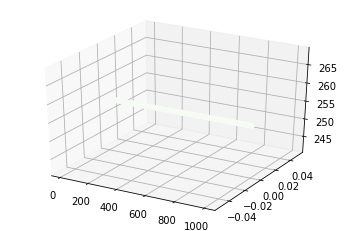

In [5]:
ax = plt.axes(projection='3d')

ax.scatter(x[10:1000], y[10:1000], z[10:1000], c=z[10:1000], cmap='Greens');

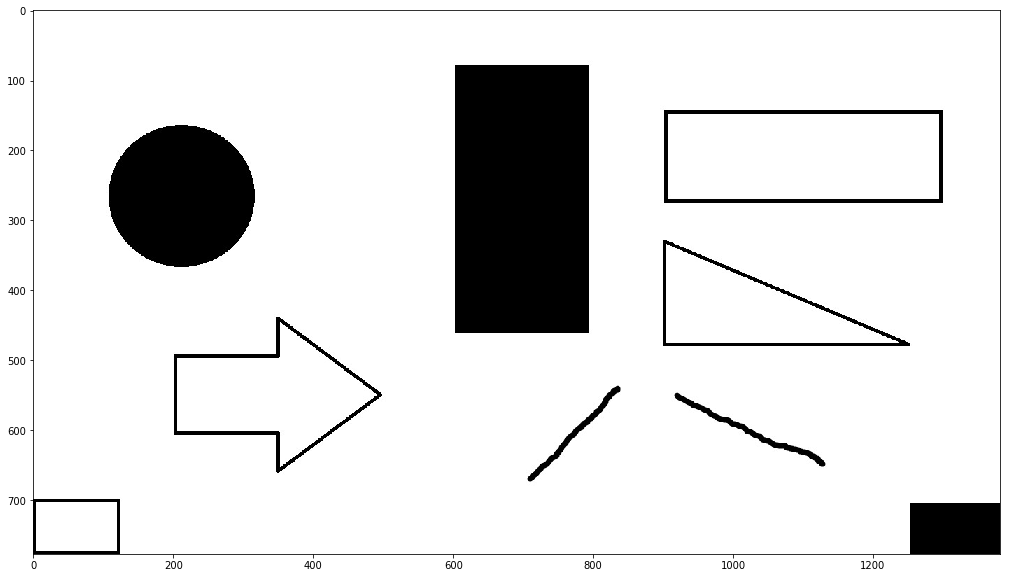

In [6]:
_ = plot([[im_shapes]])

In [7]:
img = im_shapes

In [8]:
cv2.Sobel(src=img, ksize=3, ddepth= cv2.CV_64F,dx=1, dy=1).shape

(777, 1382)

In [9]:
x = cv2.Sobel(src=img, ksize=3, ddepth= cv2.CV_64F,dx=1, dy=0)
y = cv2.Sobel(src=img, ksize=3, ddepth= cv2.CV_64F,dx=0, dy=1)
xy = cv2.Sobel(src=img, ksize=3, ddepth= cv2.CV_64F,dx=1, dy=1)
txy = cv2.Sobel(src=y, ksize=3, ddepth= cv2.CV_64F,dx=1, dy=0)

[[<matplotlib.axes._subplots.AxesSubplot at 0x2c3ca308ac8>]]

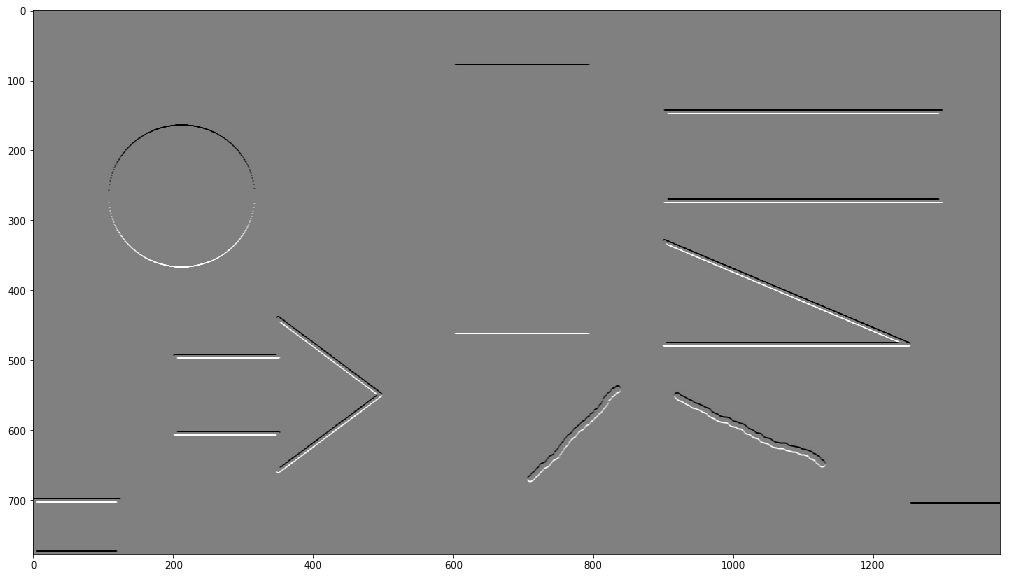

In [10]:
plot([[y]])#,[xy,txy]

[[<matplotlib.axes._subplots.AxesSubplot at 0x2c3c936fba8>]]

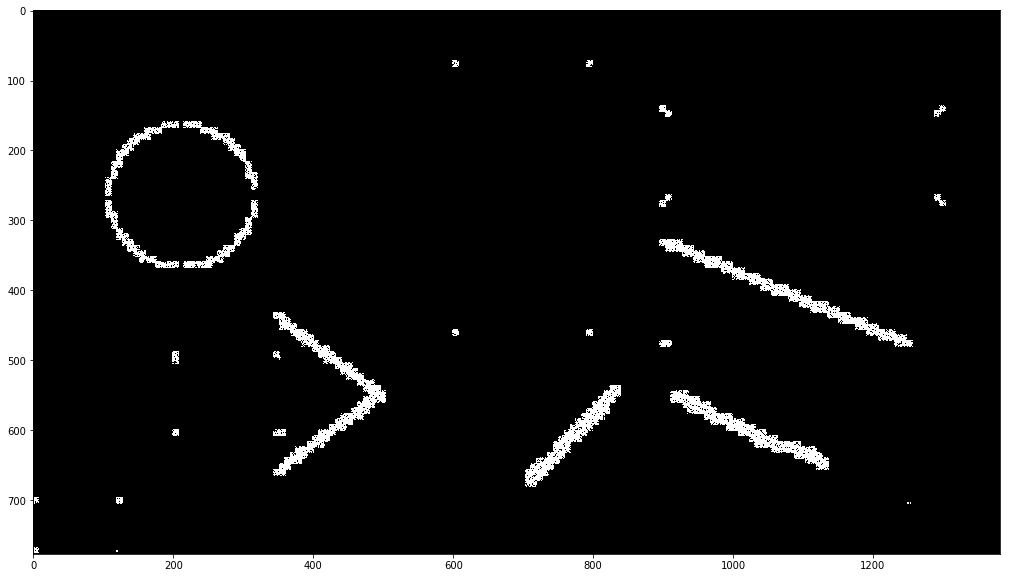

In [37]:
plot([[np.logical_and(x, y)]])

In [11]:
np.allclose(xy, txy)

False

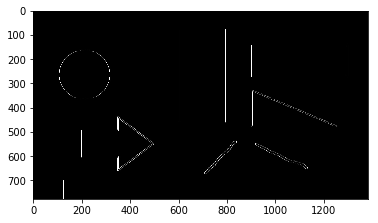

In [12]:
plt.imshow(np.sqrt(x**2, y**2), cmap='gray')

[array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C3C8CEC320>,
       dtype=object)]

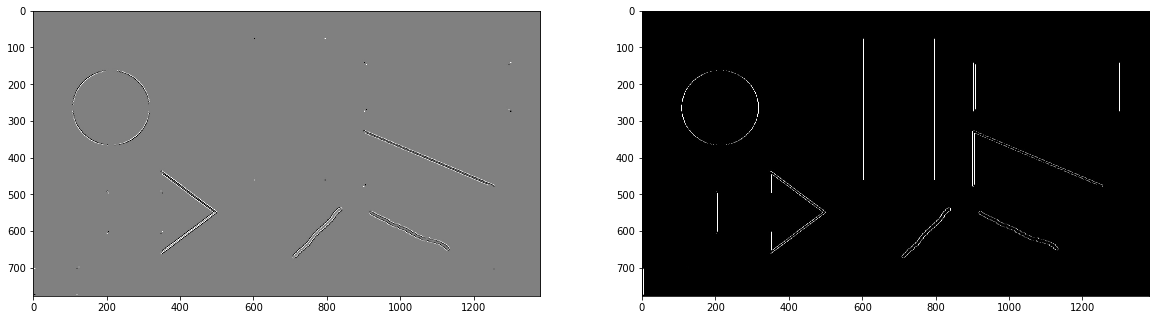

In [13]:
# cv2.Sobel(gray, cv2.CV_64F, 1, 0)
img = im_shapes
plot([[
#     cv2.Sobel(src=img, ksize=3, ddepth= cv2.CV_64F,dx=1, dy=0),
    cv2.Sobel(src=x, ksize=3, ddepth= cv2.CV_64F,dx=0, dy=1),
    np.sqrt(x**2, y**2)
# cv2.Sobel(src=img, ksize=3, ddepth= cv2.CV_64F,dx=1, dy=1)
]])

In [14]:
temp = cv2.Sobel(src=img, ksize=3, ddepth= cv2.CV_64F,dx=1, dy=0)

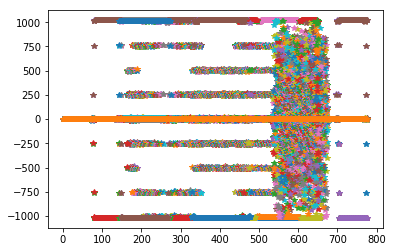

In [15]:
plt.plot(temp,'*')
plt.show()

In [16]:
temp.min()

-1020.0

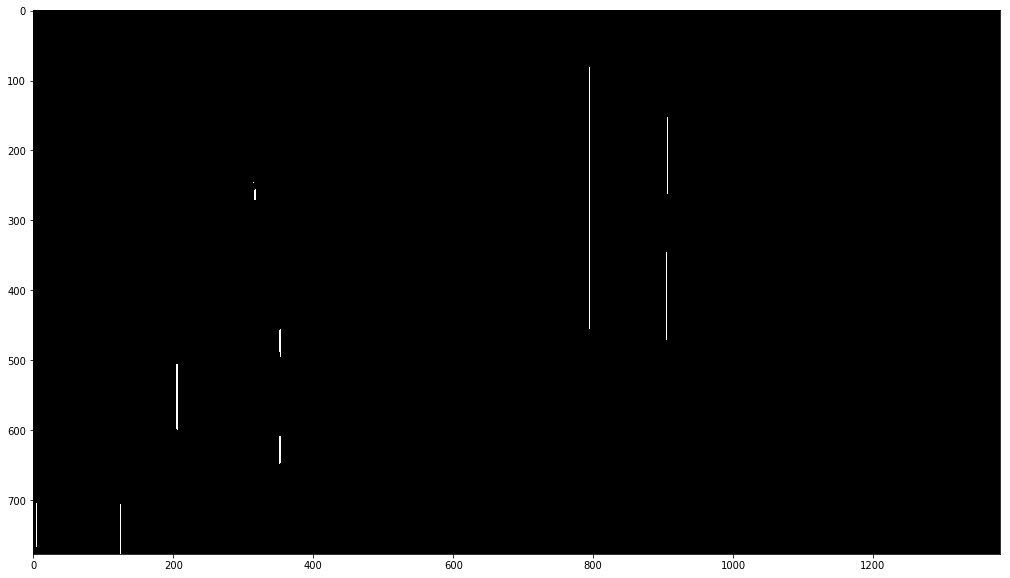

In [38]:
tmp = np.zeros_like(temp)
# tmp[np.logical_and(temp >249, temp < 251)] = 255
tmp[temp == temp.max()] = 255
plt.figure(figsize=(20,10))
plt.imshow(tmp, cmap='gray')

In [18]:
cv2.getDerivKernels(dx=1,dy=1,ksize=3)[0]

array([[-1.],
       [ 0.],
       [ 1.]], dtype=float32)

To see about kernel used in the method,
https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=sobel#void%20getDerivKernels(OutputArray%20kx,%20OutputArray%20ky,%20int%20dx,%20int%20dy,%20int%20ksize,%20bool%20normalize,%20int%20ktype)



### Sobel in action

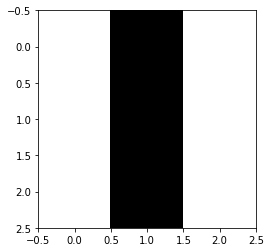

In [19]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # 231n, 131, 231a
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
img_pixel = np.array([[1, 0, 1], [1, 0, 1], [1, 0, 1]])
plt.imshow(img_pixel, cmap='gray')

In [20]:
img_pixel

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])

In [21]:
sobel_x

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [22]:
sobel_y

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [23]:
np.sum(sobel_x * img_pixel), np.sum(sobel_y * img_pixel)

(0, 0)

In [24]:
from scipy.linalg import toeplitz

In [25]:
from scipy import ndimage

In [26]:
x_grad = ndimage.correlate(img_pixel,sobel_x, mode='constant', cval=0)
y_grad = ndimage.correlate(img_pixel,sobel_y, mode='constant', cval=0)

[array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C3C8DB8550>,
       dtype=object)]

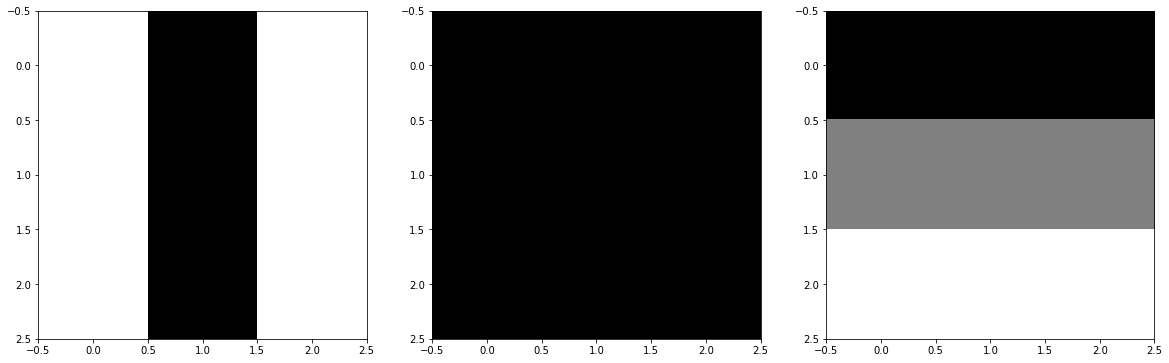

In [27]:
plot([[img_pixel, x_grad, y_grad]])

In [28]:
x_grad

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [29]:
y_grad

array([[-2, -2, -2],
       [ 0,  0,  0],
       [ 2,  2,  2]])

In [30]:
cv2.Sobel(src=img_pixel.astype(np.uint8), ksize=3, ddepth= cv2.CV_64F,dx=1, dy=0, borderType=cv2.BORDER_CONSTANT)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [31]:
cv2.Sobel(src=img_pixel.astype(np.uint8), ksize=3, ddepth= cv2.CV_64F,dx=0, dy=1, borderType=cv2.BORDER_CONSTANT)

array([[ 2.,  2.,  2.],
       [ 0.,  0.,  0.],
       [-2., -2., -2.]])

[[<matplotlib.axes._subplots.AxesSubplot at 0x2c3ca249978>]]

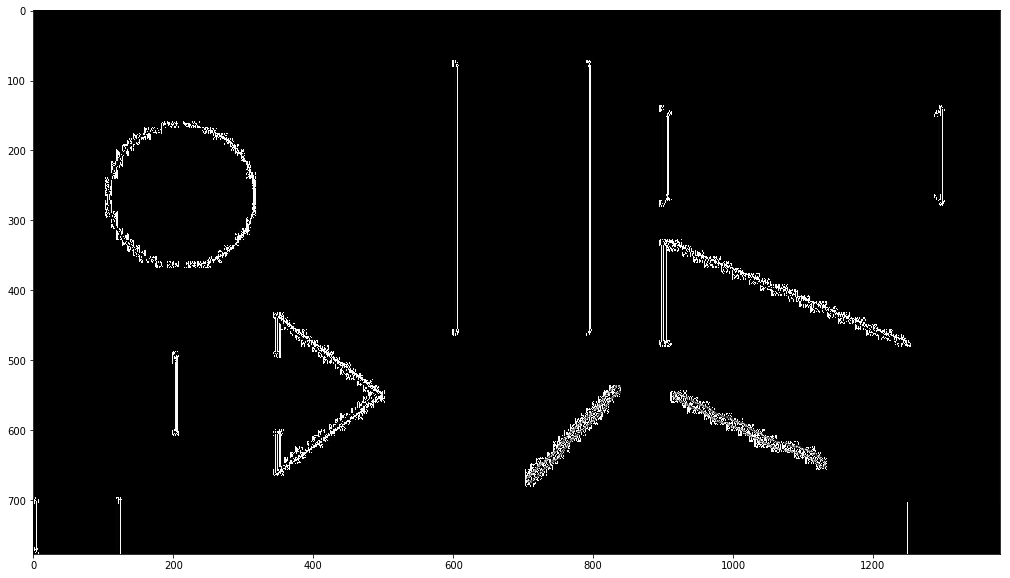

In [32]:
plot([[ndimage.correlate(im_shapes,sobel_x, mode='constant', cval=0)]])

[[<matplotlib.axes._subplots.AxesSubplot at 0x2c3ca292cf8>]]

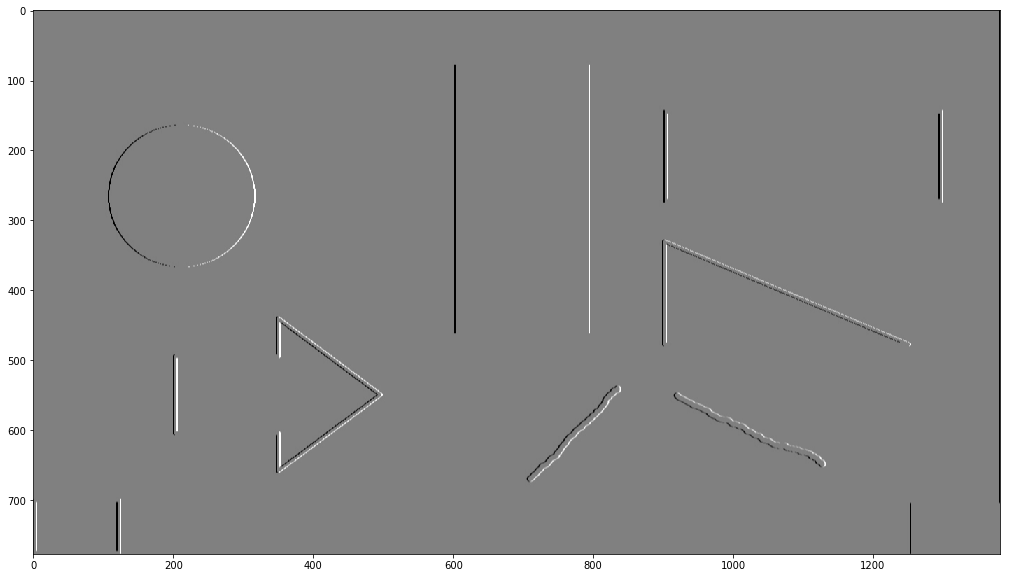

In [33]:
plot([[cv2.Sobel(src=im_shapes, ksize=3, ddepth= cv2.CV_64F,dx=1, dy=0, borderType=cv2.BORDER_CONSTANT)]])

[[<matplotlib.axes._subplots.AxesSubplot at 0x2c3c9065b38>]]

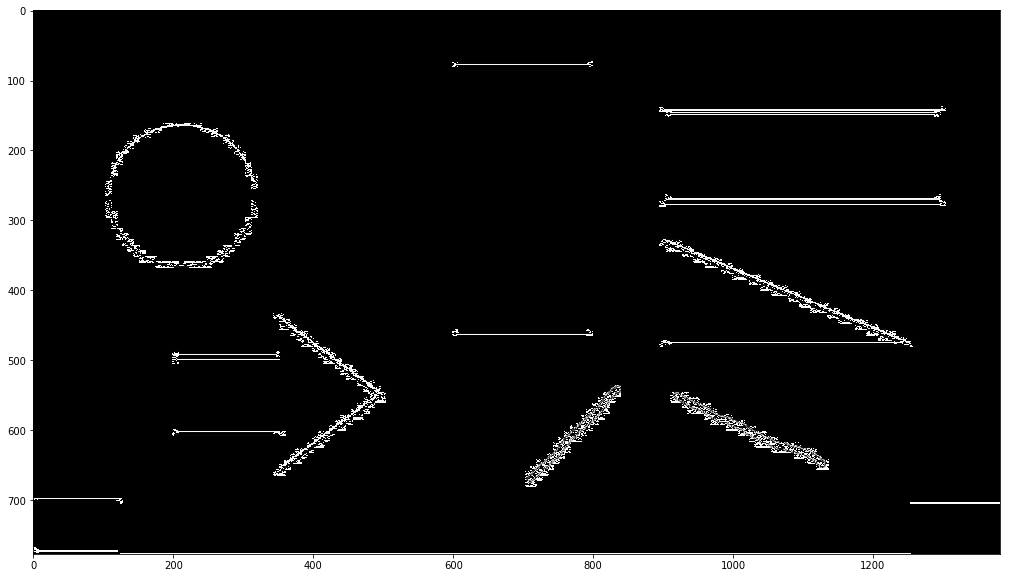

In [34]:
plot([[ndimage.correlate(im_shapes,sobel_y, mode='constant', cval=0)]])

[[<matplotlib.axes._subplots.AxesSubplot at 0x2c3c936fa20>]]

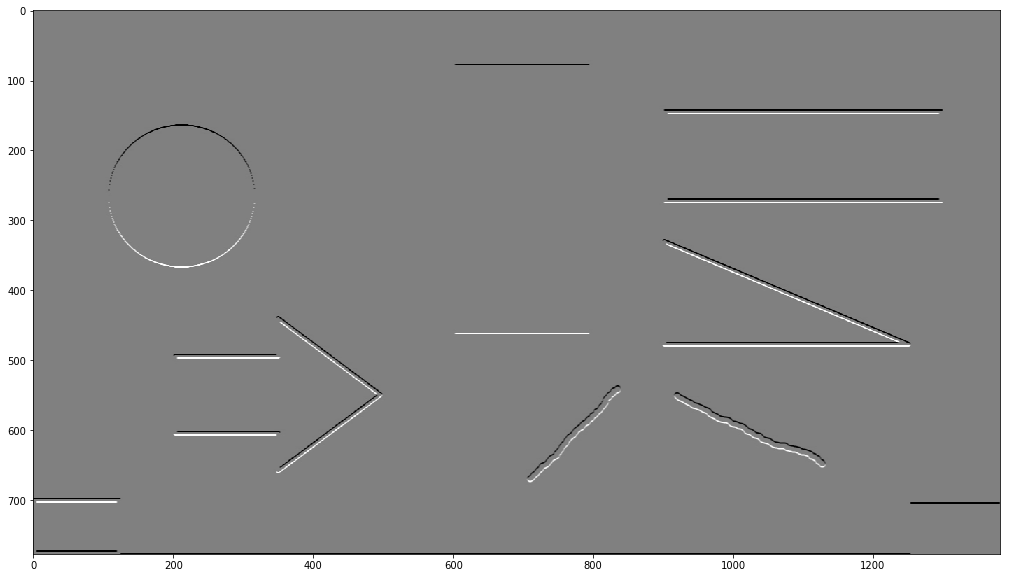

In [35]:
plot([[cv2.Sobel(src=im_shapes, ksize=3, ddepth= cv2.CV_64F,dx=0, dy=1, borderType=cv2.BORDER_CONSTANT)]])

In [36]:
# Sobel won't work in the edges of image?